In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [15]:
sns.set_style('whitegrid')
%matplotlib inline

In [16]:
from pandas_datareader import data
from datetime import datetime

In [17]:
datetime(2017,1,1)

datetime.datetime(2017, 1, 1, 0, 0)

In [18]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [19]:
end1=datetime.now()
start1=(end1.year-1,end1.month,end1.day)
start1

(2018, 4, 3)

In [20]:
prices=data.get_data_yahoo(['CVX','XOM','BP'],start=datetime(2017,1,1),end=datetime(2018,1,1))['Adj Close']

In [21]:
prices.head()

Symbols,BP,CVX,XOM
Date,,,
2017-01-03,33.158531,108.049889,83.149696
2017-01-04,33.411587,108.022377,82.234871
2017-01-05,33.655910,107.554787,81.008972
2017-01-06,33.080002,107.123878,80.963234
2017-01-09,32.556450,106.207031,79.627571


In [225]:
tech_list=['AAPL','GOOG','MSFT','AMZN']
for stock in tech_list:
    globals()[stock]=data.get_data_yahoo(stock,start=datetime(2018,1,1),end=datetime(2019,1,1))

In [226]:
DataFrame(GOOG.describe())

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,1125.777606,1101.001658,1113.554101,1113.225134,1.741591e+06,1113.225134
std,64.329256,69.119000,67.218287,67.315548,7.171989e+05,67.315548
min,1003.539978,970.109985,973.900024,976.219971,6.790000e+05,976.219971
25%,1072.609985,1046.330017,1058.320007,1056.800049,1.273850e+06,1056.800049
50%,1115.000000,1096.010010,1104.589966,1103.979980,1.531300e+06,1103.979980
75%,1176.299988,1156.664978,1167.664978,1166.894958,2.058050e+06,1166.894958
max,1273.890015,1249.020020,1271.000000,1268.329956,4.857900e+06,1268.329956


In [232]:
goog=DataFrame(GOOG)
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941


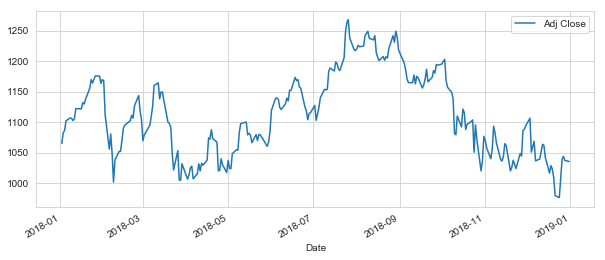

In [234]:
fig=goog['Adj Close'].plot(legend=True,figsize=(10,4))


# Moving Averages

In [28]:
for day in [10,20,50]:
    column_name= "MA for {} days".format(day)
    goog[column_name]=GOOG.rolling(window=day).mean()


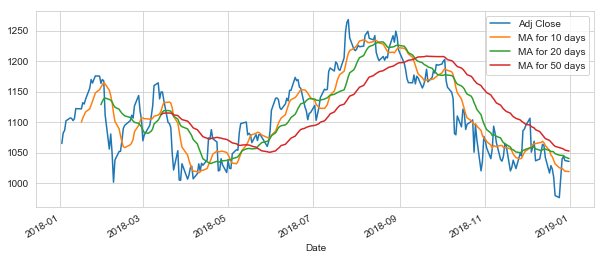

In [29]:
goog[["Adj Close",'MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

In [30]:
goog['Adj Close'].pct_change().head()

Date
2018-01-02         NaN
2018-01-03    0.016413
2018-01-04    0.003621
2018-01-05    0.014571
2018-01-08    0.004273
Name: Adj Close, dtype: float64

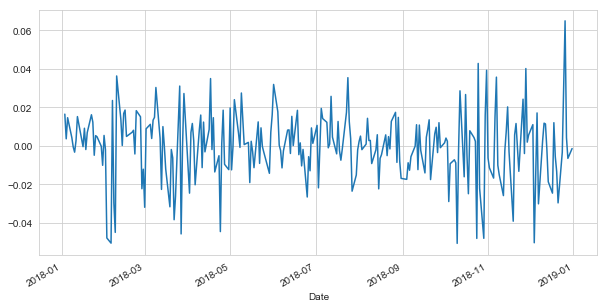

In [31]:
goog['Daily return']=goog['Adj Close'].pct_change()
goog['Daily return'].plot(figsize=(10,5))

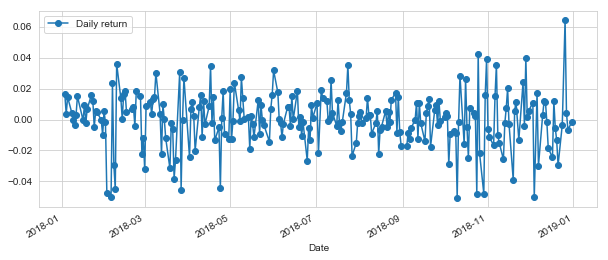

In [32]:
goog['Daily return'].plot(legend=True,figsize=(10,4),marker='o',linestyle='-')

In [33]:
goog['Daily return'].head()

Date
2018-01-02         NaN
2018-01-03    0.016413
2018-01-04    0.003621
2018-01-05    0.014571
2018-01-08    0.004273
Name: Daily return, dtype: float64

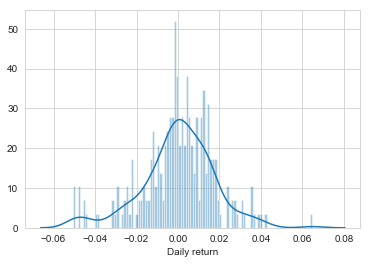

In [34]:
sns.distplot(goog['Daily return'].dropna(),bins=100)

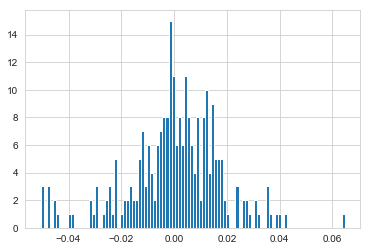

In [35]:
goog['Daily return'].hist(bins=100)

In [36]:
closing_df=data.get_data_yahoo(tech_list,start=datetime(2018,1,1),end=datetime(2019,1,1))['Adj Close']

In [37]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-02,168.987320,1189.010010,1065.000000,84.128128
2018-01-03,168.957886,1204.199951,1082.479980,84.519646
2018-01-04,169.742706,1209.589966,1086.400024,85.263542
2018-01-05,171.675278,1229.140015,1102.229980,86.320648
2018-01-08,171.037628,1246.869995,1106.939941,86.408737


In [38]:
tech_retrns=closing_df.pct_change()

In [39]:
tech_retrns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.016413,0.004654
2018-01-04,0.004645,0.004476,0.003621,0.008801
2018-01-05,0.011385,0.016163,0.014571,0.012398
2018-01-08,-0.003714,0.014425,0.004273,0.001020


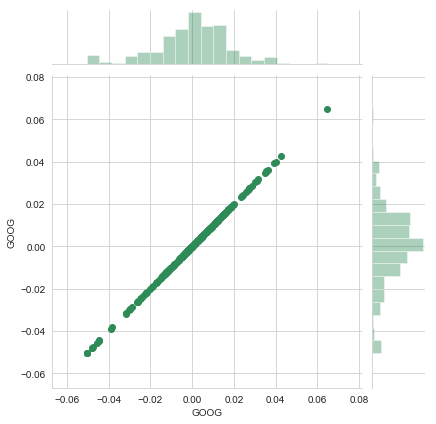

In [40]:
sns.jointplot('GOOG','GOOG',tech_retrns,kind='scatter',color='seagreen')

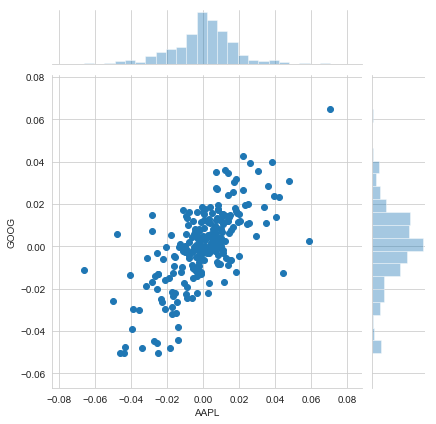

In [41]:
sns.jointplot('AAPL','GOOG',tech_retrns,kind='scatter')

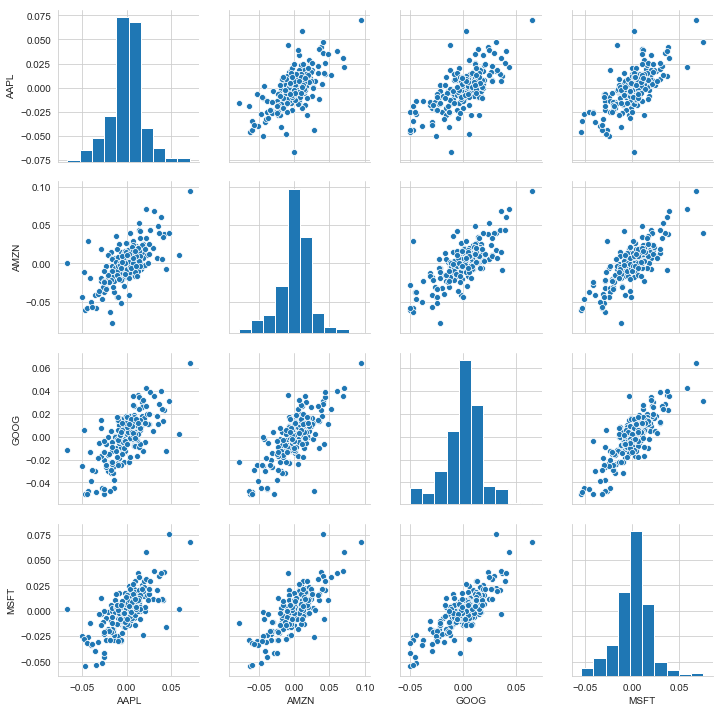

In [42]:
sns.pairplot(tech_retrns.dropna())

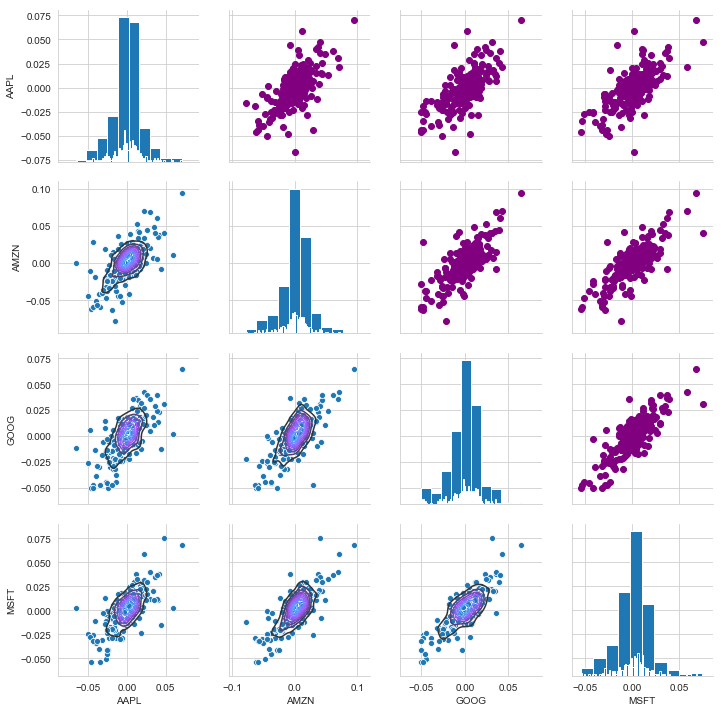

In [43]:
rtrn_fig=sns.pairplot(tech_retrns.dropna())
rtrn_fig.map_upper(plt.scatter,color='purple')
rtrn_fig.map_lower(sns.kdeplot,cmap='cool_d')
rtrn_fig.map_diag(plt.hist,bins=100)

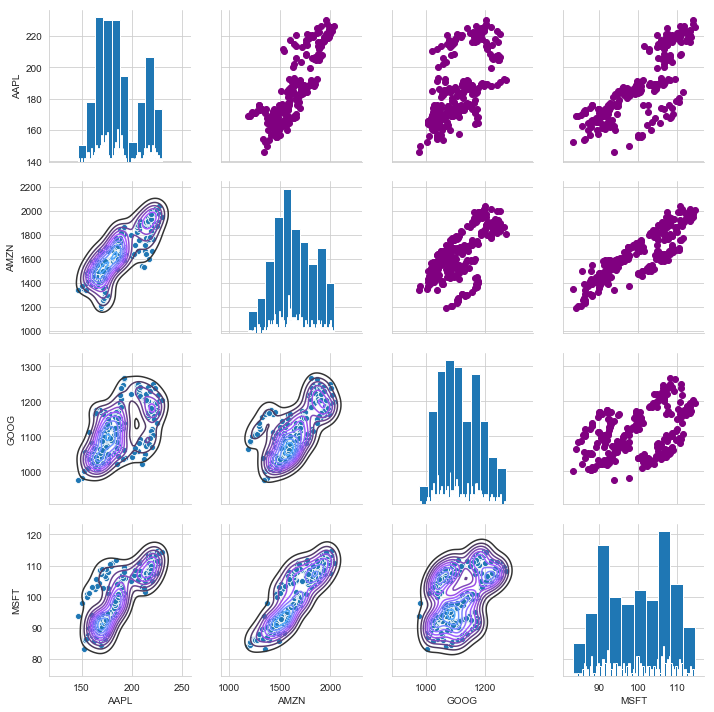

In [44]:
rtrn_fig=sns.pairplot(closing_df.dropna())
rtrn_fig.map_upper(plt.scatter,color='purple')
rtrn_fig.map_lower(sns.kdeplot,cmap='cool_d')
rtrn_fig.map_diag(plt.hist,bins=100)

In [45]:
tech_retrns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.016413,0.004654
2018-01-04,0.004645,0.004476,0.003621,0.008801
2018-01-05,0.011385,0.016163,0.014571,0.012398
2018-01-08,-0.003714,0.014425,0.004273,0.001020


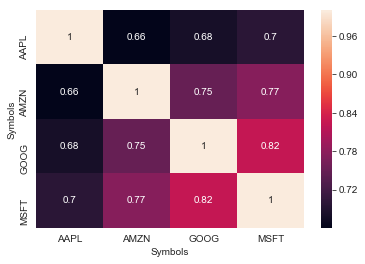

In [46]:
sns.heatmap(tech_retrns.dropna().corr(),annot=True)

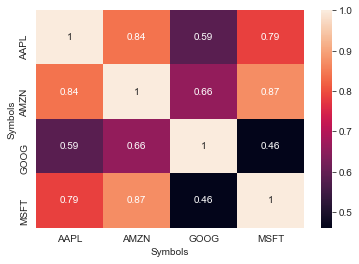

In [47]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

In [48]:
rets=tech_retrns.dropna()

In [49]:
area=np.pi*20

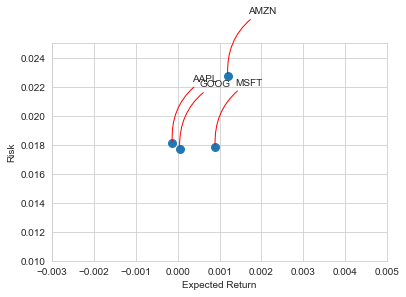

In [250]:
plt.scatter(rets.mean(),rets.std(),s=area)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.005])
plt.xlabel('Expected Return')
plt.ylabel("Risk")
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(20,60),textcoords='offset points',ha='left',va='bottom'
                   ,arrowprops=dict(arrowstyle="-",connectionstyle='arc3,rad=0.3',color='red'))

In [51]:
for x,y,z in zip(rets.columns,rets.mean(),rets.std()):
    print (x,y,z)

AAPL -0.00012910959059611837 0.018106270796891002
AMZN 0.0011937267617928079 0.02276823038454494
GOOG 4.5236963362147e-05 0.01772364137592482
MSFT 0.000895123036787338 0.017838649167699075


In [52]:
goog['Daily return'].head()

Date
2018-01-02         NaN
2018-01-03    0.016413
2018-01-04    0.003621
2018-01-05    0.014571
2018-01-08    0.004273
Name: Daily return, dtype: float64

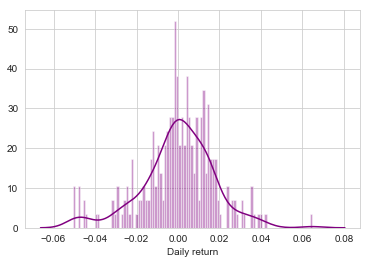

In [53]:
sns.distplot(goog['Daily return'].dropna(),bins=100,color='purple')

In [54]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-03,-0.000174,0.012775,0.016413,0.004654
2018-01-04,0.004645,0.004476,0.003621,0.008801
2018-01-05,0.011385,0.016163,0.014571,0.012398
2018-01-08,-0.003714,0.014425,0.004273,0.001020
2018-01-09,-0.000115,0.004676,-0.000614,-0.000680


In [55]:
DataFrame(rets['AAPL']).quantile(0.05)

AAPL   -0.02993
Name: 0.05, dtype: float64

# Mont Carlos method

In [127]:
days=365
dt=1/days
mu=rets['GOOG'].mean()
sigma=rets['GOOG'].std()

In [128]:
np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

0.000566808918596318

In [129]:
def monte_carlo_method(start_price,days,mu,sigma):
    prices=np.zeros(days)
    prices[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        dt=1/x
        shock[x]= np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        prices[x]=prices[x-1]+(prices[x-1]*(drift[x]+shock[x]))
    return prices

In [130]:
rets.head()['GOOG']

Date
2018-01-03    0.016413
2018-01-04    0.003621
2018-01-05    0.014571
2018-01-08    0.004273
2018-01-09   -0.000614
Name: GOOG, dtype: float64

In [131]:
rets['GOOG'].head().values[0]


0.016413127200704203

In [132]:
mu

4.5236963362147e-05

In [133]:
sigma

0.01772364137592482

In [202]:
start_price=GOOG.head().values[0]


Text(0.5,1,"monte carlo's method")

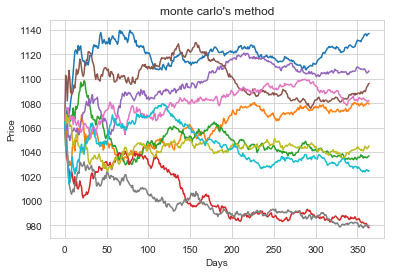

In [203]:
for i in range(10):
    plt.plot(monte_carlo_method(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("monte carlo's method")

In [204]:
runs=100
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=monte_carlo_method(start_price,days,mu,sigma)[days-1]
                                    

In [205]:
q=np.percentile(simulations,1)
q

991.1553434923994

Text(0.5,1,'Final price for the distribution for google stock after 365 days')

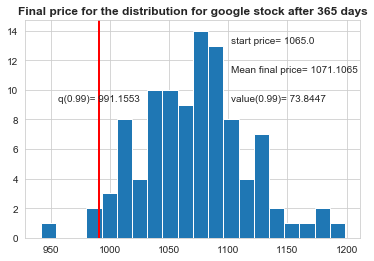

In [213]:
plt.hist(simulations,bins=20)
plt.figtext(0.6,0.8,s="start price= {}".format(round(start_price,4)))
plt.figtext(0.6,0.7,s="Mean final price= {}".format(round(simulations.mean(),4)))
plt.figtext(0.6,0.6,s="value(0.99)= {}".format(round(start_price-q,4)))
plt.figtext(0.2,0.6,s="q(0.99)= {}".format(round(q,4)))
plt.axvline(x=q,linewidth=2,color='red')
plt.title("Final price for the distribution for google stock after {0} days".format(days),weight='bold')

# Monte Carlo's method for google stocks


In [207]:
GOOG.head()

Date
2018-01-02    1065.000000
2018-01-03    1082.479980
2018-01-04    1086.400024
2018-01-05    1102.229980
2018-01-08    1106.939941
Name: Adj Close, dtype: float64

In [208]:
days=365
dt=1/days
U=GOOG.mean()
Sig=GOOG.std()

In [209]:
U

1113.225134131443

In [210]:
Sig

67.31554806154989

In [211]:
def monte_carlo_google(startprice,days,U,Sig):
    shock=np.zeros(days)
    drift=np.zeros(days)
    prices=np.zeros(days)
    prices[0]=startprice
    for x in range(1,days):
        shock[x]= np.random.normal(loc=U*dt,scale=Sig*np.sqrt(dt))
        drift[x]=U*dt
        prices[x]=prices[x-1]+(prices[x-1]*(drift[x]+shock[x]))
    return prices

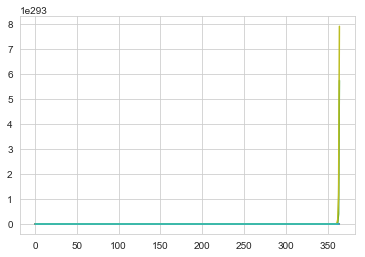

In [212]:
for i in range(10):
    plt.plot(monte_carlo_google(1065,days,U,Sig))

In [201]:
GOOG.quantile(0.05)

1019.9749755859375